In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-10-20,70.0,301.0,213.0,0.0,220.0,0.0,16337.0,1234.0,38.0,1524.0,...,21365.0,63.0,308.0,1008.0,1.0,513.0,0.0,1.0,85.0,28.0
2020-10-21,153.0,297.0,252.0,188.0,289.0,3.0,18326.0,1836.0,15.0,1958.0,...,26707.0,40.0,179.0,391.0,3.0,499.0,0.0,0.0,18.0,28.0
2020-10-22,116.0,302.0,276.0,0.0,244.0,0.0,16325.0,2306.0,18.0,2435.0,...,21257.0,38.0,429.0,381.0,4.0,506.0,0.0,0.0,35.0,27.0
2020-10-23,61.0,306.0,273.0,227.0,247.0,0.0,15718.0,2474.0,19.0,2571.0,...,20559.0,58.0,285.0,302.0,0.0,445.0,0.0,3.0,60.0,15.0
2020-10-24,81.0,302.0,250.0,0.0,197.0,2.0,11968.0,2213.0,18.0,3614.0,...,23033.0,48.0,199.0,424.0,12.0,410.0,0.0,0.0,22.0,12.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
US                83718.0
India             50129.0
Brazil            26979.0
United Kingdom    23033.0
Italy             19640.0
Belgium           17709.0
Russia            16260.0
Poland            13628.0
Czechia           12474.0
Argentina         11968.0
Colombia           8769.0
Germany            8688.0
Netherlands        8683.0
Ukraine            7275.0
Mexico             6025.0
Iran               5814.0
Romania            4761.0
Indonesia          4070.0
Morocco            4045.0
Portugal           3669.0
Name: 2020-10-24 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

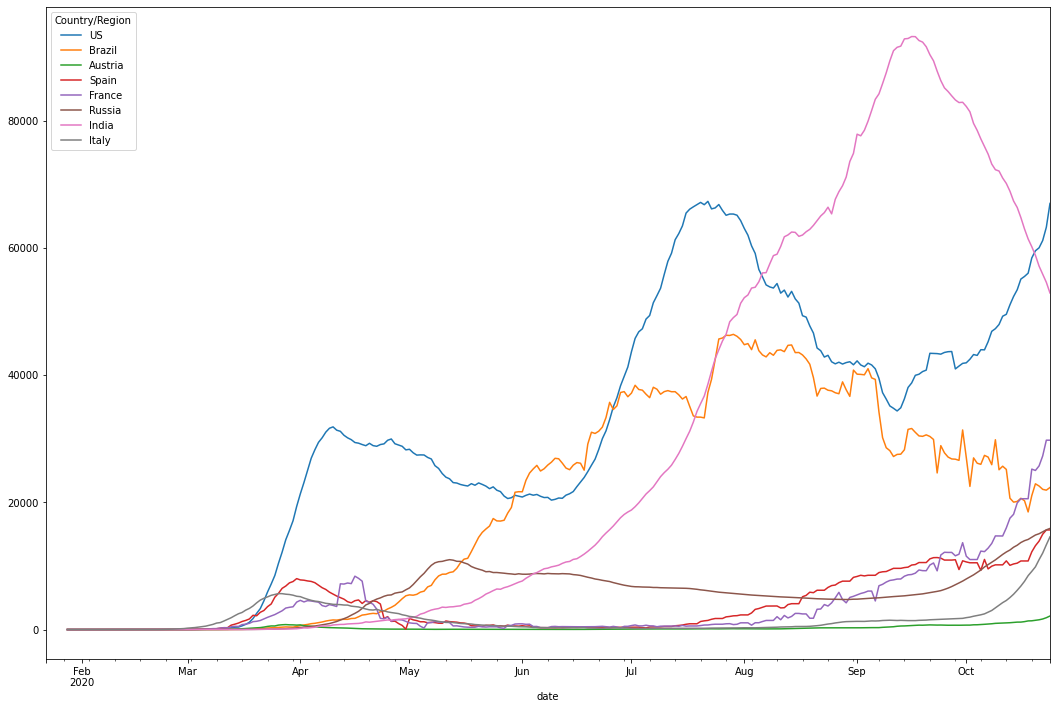

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

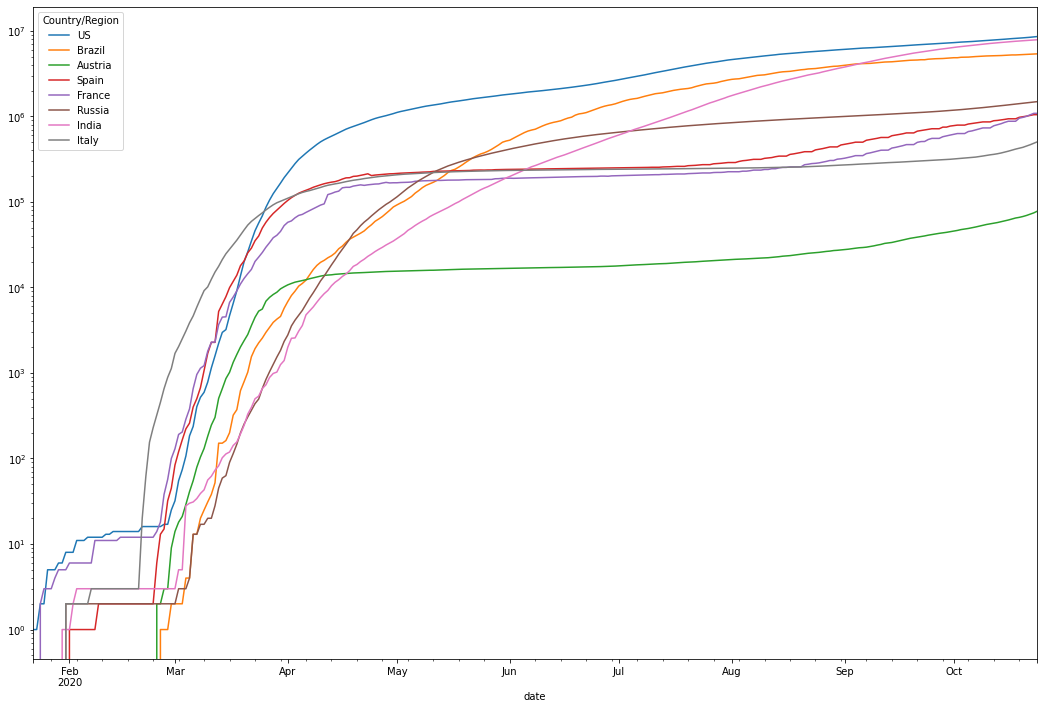

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-10-20,1499,458,1873,62,251,3,27100,1101,905,914,...,44057,52,534,747,35,421,1,597,346,233
2020-10-21,1501,462,1880,63,255,3,27519,1121,905,925,...,44248,53,534,753,35,427,1,597,346,236
2020-10-22,1505,465,1888,63,260,3,27957,1131,905,941,...,44437,53,540,759,35,435,1,597,346,236
2020-10-23,1507,469,1897,69,265,3,28338,1145,905,954,...,44661,53,542,764,35,439,1,599,346,236
2020-10-24,1511,473,1907,69,267,3,28613,1157,905,965,...,44835,53,544,770,35,443,1,599,348,236


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                224889
Brazil            156903
India             118534
Mexico             88743
United Kingdom     44835
Italy              37210
Spain              34752
France             34536
Peru               34033
Iran               32320
Colombia           30000
Argentina          28613
Russia             25647
South Africa       18944
Chile              13892
Name: 2020-10-24 00:00:00, dtype: int64

In [10]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-10-20,933.0,661.0,10.0,218.0,281.0,268.0,717.0,89.0
2020-10-21,1124.0,566.0,11.0,156.0,147.0,313.0,702.0,127.0
2020-10-22,856.0,497.0,16.0,155.0,162.0,286.0,690.0,136.0
2020-10-23,943.0,571.0,13.0,231.0,299.0,281.0,650.0,91.0
2020-10-24,914.0,432.0,11.0,0.0,0.0,294.0,578.0,151.0


### New Deaths (moving average, 7 days)

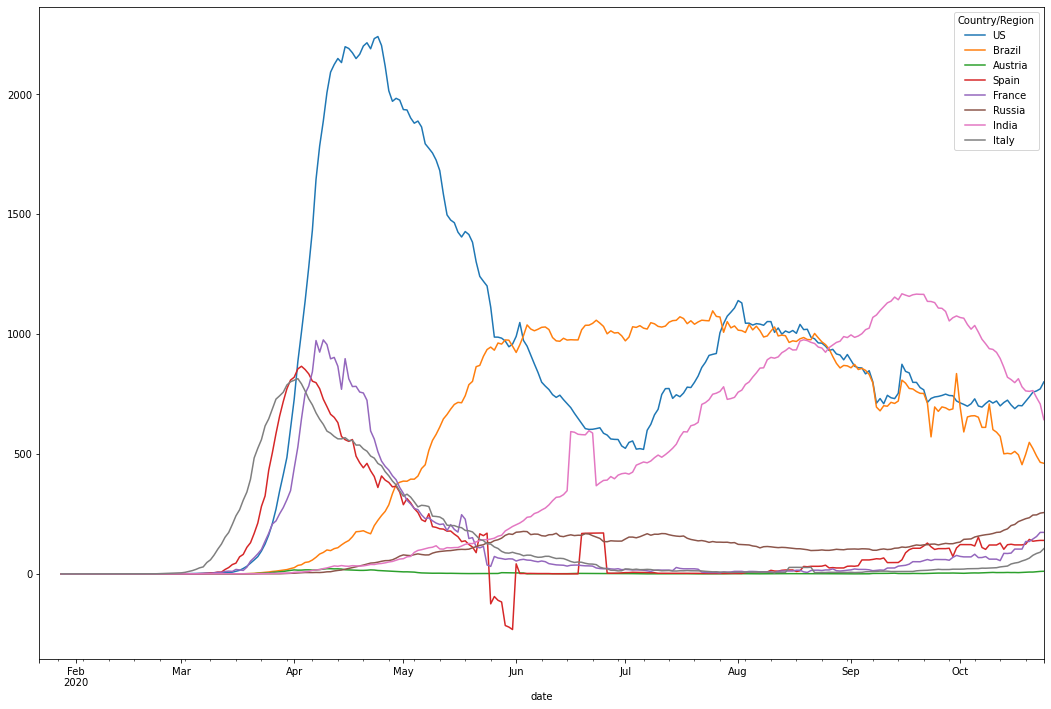

In [11]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

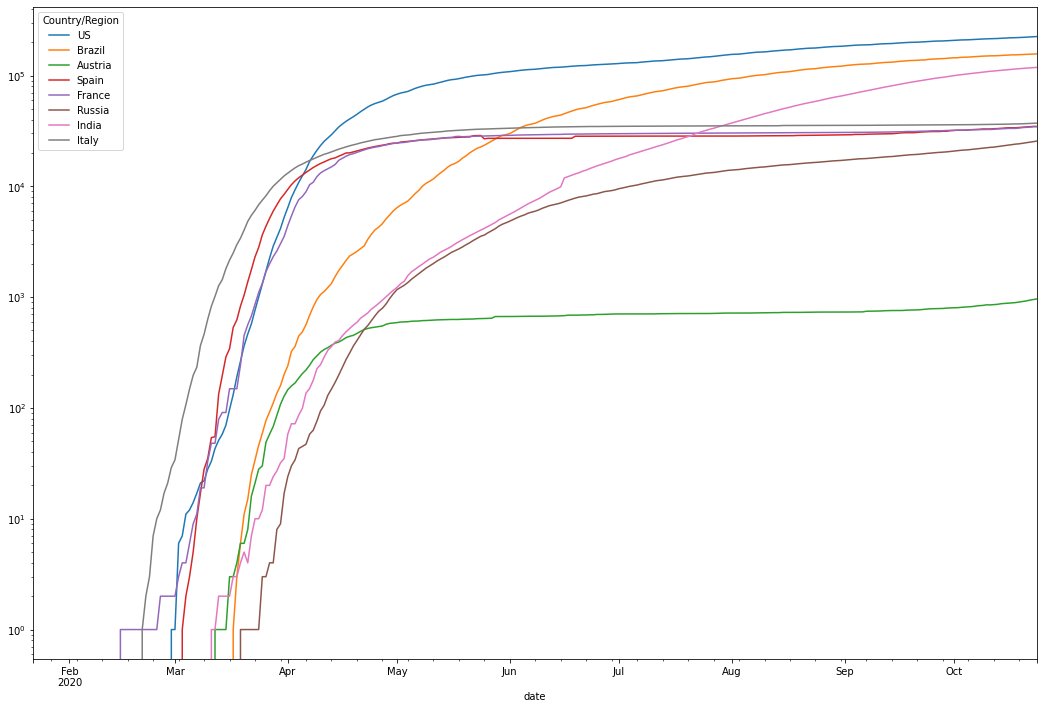

In [12]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [13]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-10-20,22545.0,0.0,1048.0,0.0,904.0,9541.0,61775.0,2046.0
2020-10-21,28206.0,0.0,1210.0,0.0,1200.0,10803.0,79415.0,2369.0
2020-10-22,29702.0,0.0,1353.0,0.0,947.0,11300.0,73979.0,2082.0
2020-10-23,22371.0,0.0,1225.0,0.0,974.0,11172.0,67549.0,2352.0
2020-10-24,31229.0,0.0,1596.0,0.0,0.0,11419.0,62077.0,2309.0


### New Recovered (moving average, 7 days)

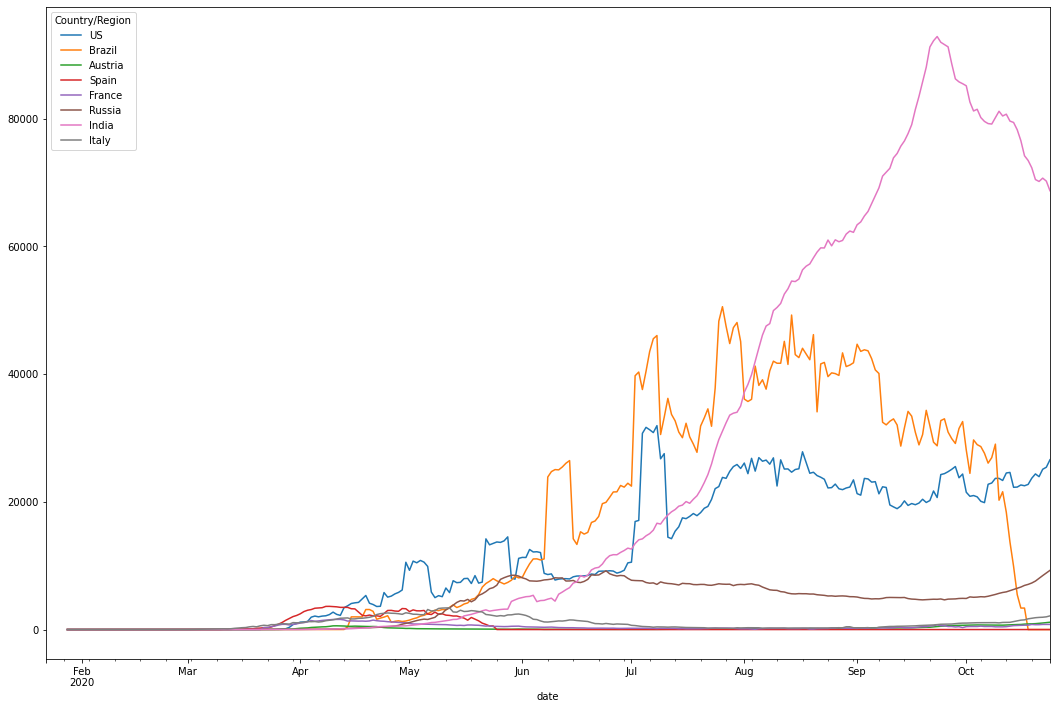

In [15]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [16]:
df_recovered.loc["2020-02-23","Italy"] = 1

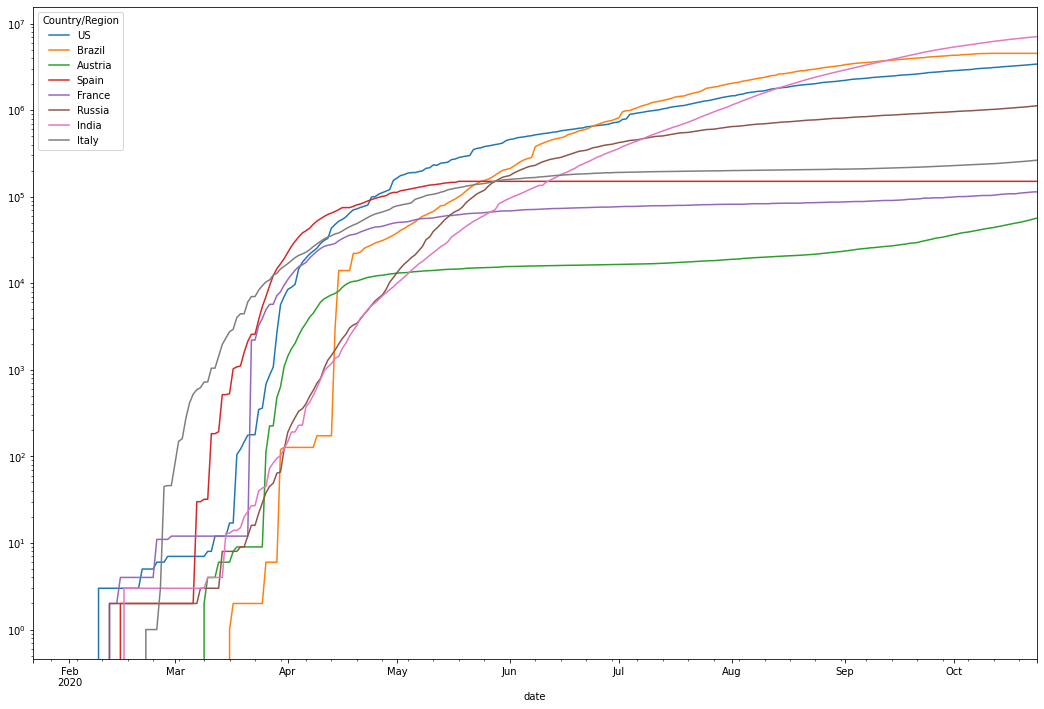

In [17]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [18]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [19]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [20]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [21]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [22]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [23]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [24]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [25]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [26]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [27]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [28]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [29]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [30]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

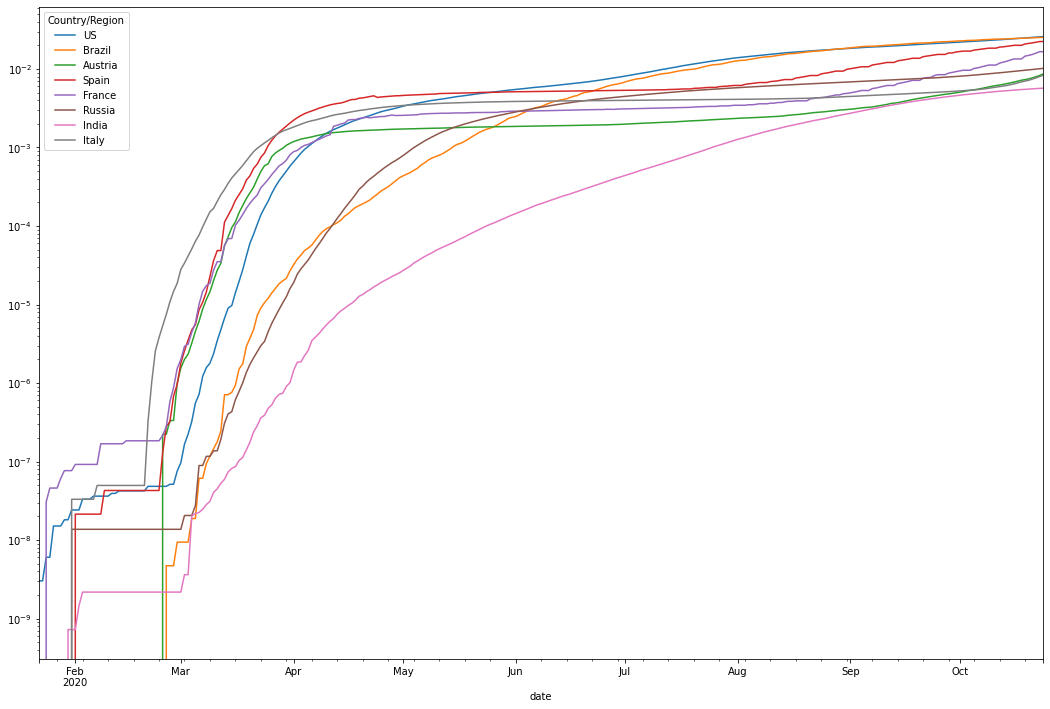

In [31]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

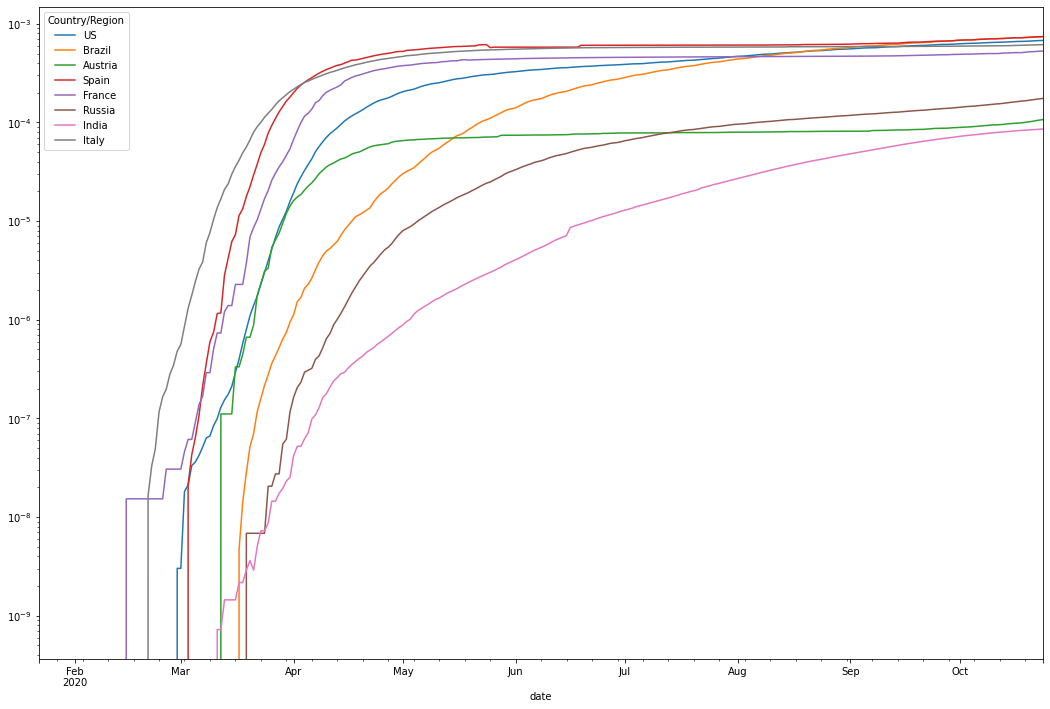

In [32]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

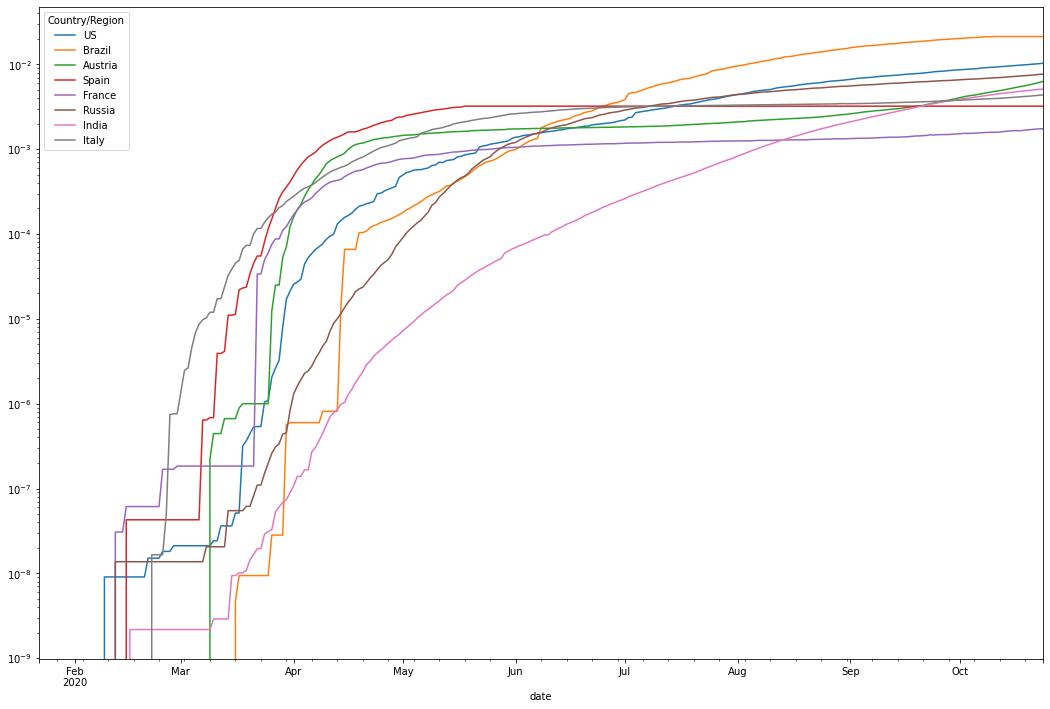

In [33]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

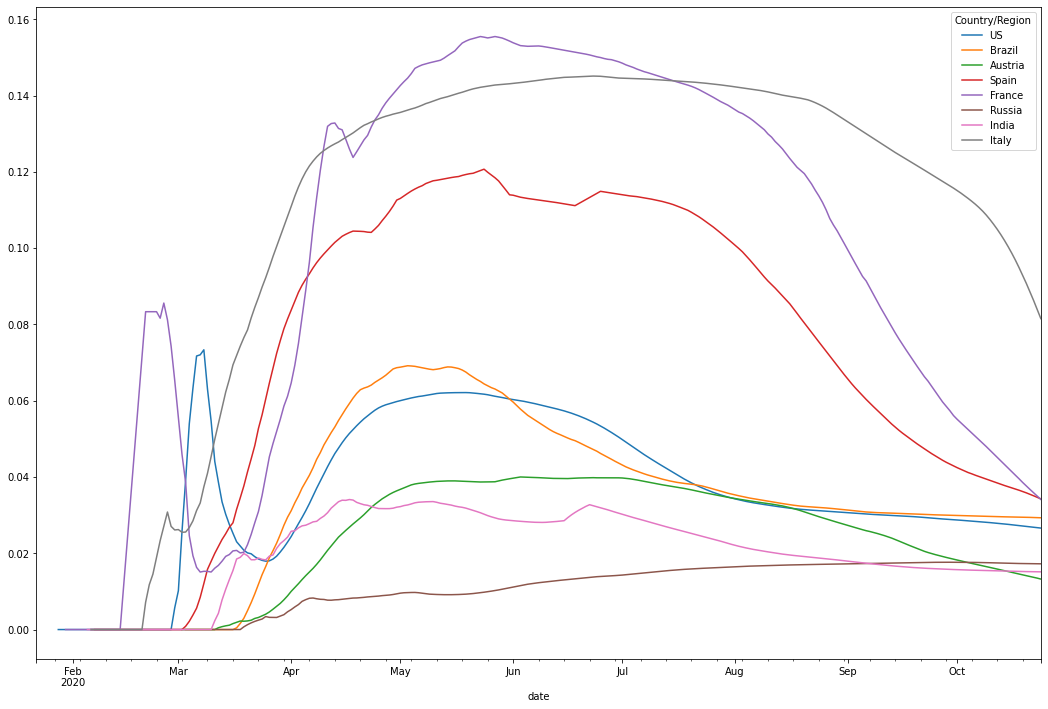

In [34]:
ratio = df_deaths/df_cases
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()